In [ ]:

import pandas as pd
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

for theory i have refered to udacity course ,for canny =model 2a
for hough line-model 2b and for bird view model 3d
https://learn.udacity.com/courses/ud810


for lane detection , i have used canny edge detector ,masking,houghline method and finaly have average out the line accordingly and shown the output

In [ ]:
img1=cv2.imread('im1.png',0)

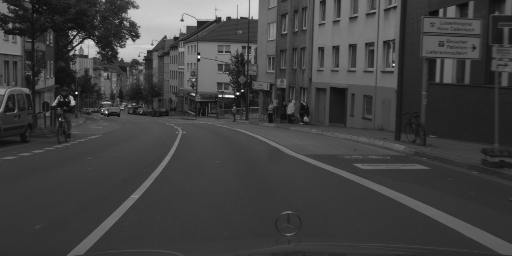

In [ ]:
cv2_imshow(img1)

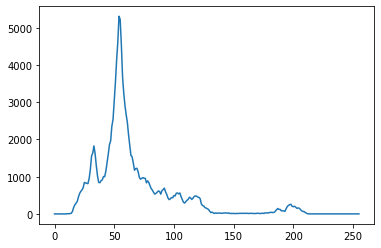

In [ ]:
histr = cv2.calcHist([img1],[0],None,[256],[0,256])
plt.plot(histr)
plt.show()

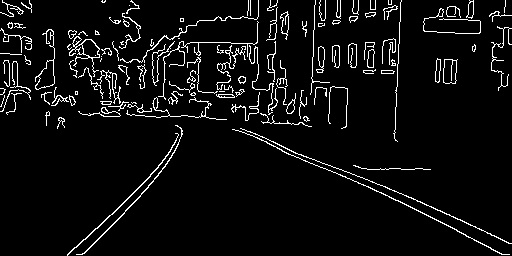

In [ ]:
img1=cv2.GaussianBlur(img1, (5, 5), 0)
canny_img1=cv2.Canny(img1,50,150)
cv2_imshow(canny_img1)

In [ ]:
img1.shape

(256, 512)

In [ ]:
 height, width = img1.shape

In [ ]:
p1 = (0, height-3)
p2 = (250, 130)
p3 = (width, height-3)
p4=(100,100)
r=(255,0,0)

In [ ]:
#img2=cv2.line(canny_img1, p1, p2,r, 9)
#img2=cv2.line(canny_img1, p2, p3, r,9)
#img2=cv2.line(canny_img1, p1, p3,r, 9)


#cv2_imshow(img2)
  

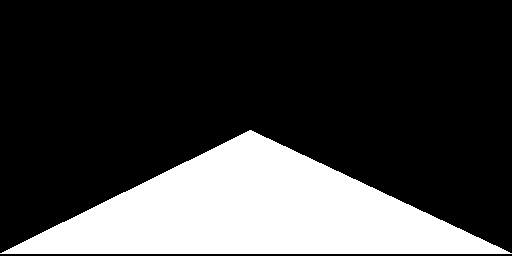

In [ ]:
img = np.zeros([256, 512],dtype=np.uint8)
pts = np.array([[0,253],[512,253],[250,130]], np.int32)
cv2.fillPoly(img, [pts], 255)
cv2_imshow(img)


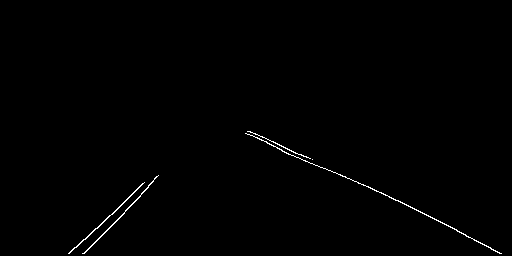

In [ ]:
img2 = cv2.bitwise_and(canny_img1, img)
cv2_imshow(img2)


In [ ]:
lines = cv2.HoughLinesP(img2,2,np.pi/180,100,minLineLength=0,maxLineGap=1000)



In [ ]:
left = []
right = []
for line in lines:

    x1, y1, x2, y2 = line.reshape(4)
    parameters = np.polyfit((x1, x2), (y1, y2), 1)
    slope = parameters[0]
    y_int = parameters[1]
    if slope < 0:
        left.append((slope, y_int))
    
    else:
        right.append((slope, y_int))
print(left)

[(-0.9374999999999992, 317.6874999999999), (-1.0434782608695643, 340.6521739130435)]


In [ ]:
def make_points(image, average): 
 slope, y_int = average 
 y1 = image.shape[0]
 y2 = int(y1 * (3/5))
 x1 = int((y1 - y_int) // slope)
 x2 = int((y2 - y_int) // slope)
 return np.array([x1, y1, x2, y2])
right_avg = np.average(right, axis=0)
left_avg = np.average(left, axis=0)
left_line = make_points(img1, left_avg)
right_line = make_points(img1, right_avg)
d=np.array([left_line, right_line])
def display_lines(image, lines):
 lines_image = np.zeros_like(image)
 if lines is not None:
   for line in lines:
     x1, y1, x2, y2 = line
     cv2.line(lines_image, (x1, y1), (x2, y2), (255, 255, 255), 5)
 return lines_image
img_f=display_lines(img1,d)




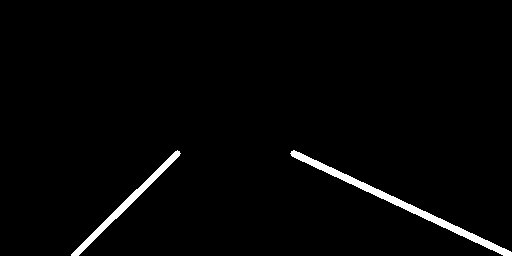

In [ ]:
cv2_imshow(img_f)


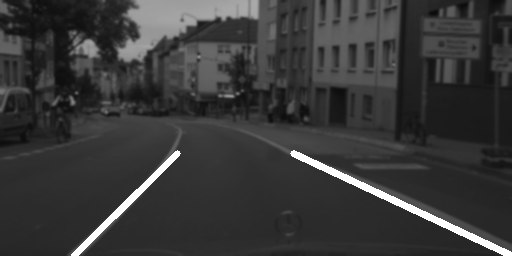

In [ ]:
lanes = cv2.addWeighted(img1, 0.8, img_f, 1, 1)
cv2_imshow(lanes)

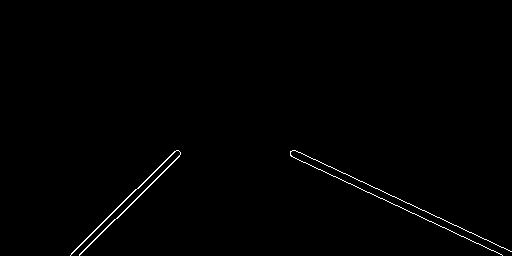

In [ ]:
canny_img_f=cv2.Canny(lanes,200,1000)
cv2_imshow(canny_img_f)